# Event Related Responses
In this Jupyter notebook, I'll provide a quick introduction to **evoke responses**, aiming to help you develop a basic understanding of this concept. By the end of this tutorial, you'll have gained an intuition into evoke responses and their underlying principles.

## Simulating data

In [117]:
import numpy as np
import matplotlib.pyplot as plt

import mne


In [118]:
sampfreq = 1000
prestim = .1
times = np.arange(400, dtype=np.float64) / sampfreq - prestim

def data_fun(times, ntrials = 100, noiselevel = 1, jitterlevel = .5): #Ntrials + some noise
    """Generate random source time courses. Sine multiplied by exponent.
        ntrials = number of trials
        noiselevel: multiples of std of signal
        jitterlevel: shift of sine in radians (full cycle 2pi)""" #APADT TO GENERATE A MATRIX
    
    rawtrials = np.zeros((ntrials, len(times)))
    
    for i in range(ntrials):
        #sourcewave = np.sin(50.0 * times) * np.exp(-((times - np.random.normal(.1, jitterlevel)) ** 2) / 0.01)
        sourcewave = np.sin(50.0 * times - np.random.normal(0, jitterlevel)) * np.exp(-((times - .1) ** 2) / 0.01)
        noisewave = np.random.normal(0, np.std(sourcewave) * noiselevel, len(sourcewave))
        rawtrials[i,] = sourcewave + noisewave

    return rawtrials


In [127]:
test = data_fun(times, ntrials = 20, noiselevel = 2, jitterlevel= .5)

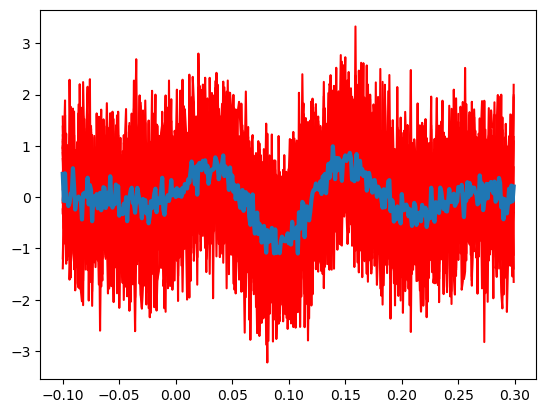

In [128]:
plt.plot(times.T, test.T, color = 'red')
plt.plot(times.T, np.mean(test.T, axis=1), linewidth = 3)
plt.show()